ライブラリのインポート

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

データのインポート

In [2]:
from tensorflow.keras.datasets import boston_housing

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data(test_split=0.2, seed=123)

In [4]:
DataFrame_train_data = pd.DataFrame(train_data)
DataFrame_test_data = pd.DataFrame(test_data)

DataFrame_train_label = pd.DataFrame(train_labels)
DataFrame_test_label = pd.DataFrame(test_labels)

データの可視化

In [5]:
DataFrame_train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
1,0.05735,0.0,4.49,0.0,0.4490,6.630,56.1,4.4377,3.0,247.0,18.5,392.30,6.53
2,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76
3,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10
4,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,8.71675,0.0,18.10,0.0,0.6930,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12
400,20.71620,0.0,18.10,0.0,0.6590,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34
401,0.04301,80.0,1.91,0.0,0.4130,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05
402,0.21161,0.0,8.56,0.0,0.5200,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44


In [6]:
DataFrame_train_label

,0
0,15.0
1,26.6
2,45.4
3,20.8
4,34.9
...,...
399,13.1
400,11.9
401,18.2
402,19.3


In [7]:
DataFrame_train_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

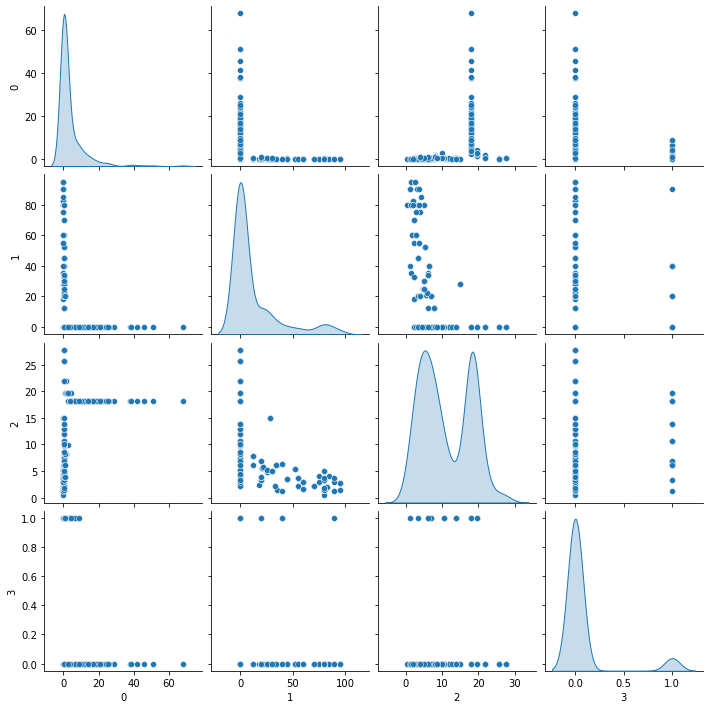

In [8]:
sns.pairplot(DataFrame_train_data[[0, 1, 2, 3]], diag_kind="kde")

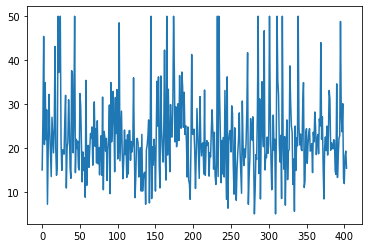

In [9]:
plt.plot(DataFrame_train_label)

In [10]:
train_stats = DataFrame_train_data.describe()

In [11]:
train_stats = train_stats.transpose()

In [12]:
test_stats = DataFrame_test_data.describe()

In [13]:
test_stats = test_stats.transpose()
test_stats

,count,mean,std,min,25%,50%,75%,max
0,102.0,3.835400,11.838348,0.01432,0.063052,0.225695,2.264062,88.9762
1,102.0,9.446078,22.581964,0.00000,0.000000,0.000000,0.000000,100.0000
2,102.0,10.936961,7.077184,0.74000,5.302500,9.795000,18.100000,27.7400
3,102.0,0.039216,0.195066,0.00000,0.000000,0.000000,0.000000,1.0000
4,102.0,0.547010,0.111456,0.39200,0.451250,0.519000,0.609000,0.8710
5,102.0,6.318814,0.742824,3.56100,5.951750,6.213500,6.588000,8.7250
6,102.0,67.370588,28.830359,6.20000,44.650000,77.400000,94.425000,100.0000
7,102.0,3.849440,2.212040,1.16910,2.124900,3.397100,4.928375,12.1265
8,102.0,8.960784,8.741527,1.00000,4.000000,5.000000,8.000000,24.0000
9,102.0,394.578431,176.284954,187.00000,266.250000,307.000000,666.000000,711.0000


データの正規化

In [14]:
train_labels

array([15. , 26.6, 45.4, 20.8, 34.9, 21.9, 28.7,  7.2, 20. , 32.2, 24.1,
       18.5, 13.5, 27. , 23.1, 18.9, 24.5, 43.1, 19.8, 13.8, 15.6, 50. ,
       37.2, 46. , 50. , 21.2, 14.9, 19.6, 19.4, 18.6, 26.5, 32. , 10.9,
       20. , 21.4, 31. , 25. , 15.4, 13.1, 37.6, 37. , 18.9, 27.9, 50. ,
       14.4, 22. , 19.9, 21.6, 15.6, 15. , 32.4, 29.6, 20.4, 12.3, 19.1,
       14.9, 17.8,  8.8, 35.4, 11.5, 19.6, 20.6, 15.6, 19.9, 23.3, 22.3,
       24.8, 16.1, 22.8, 30.5, 20.4, 24.4, 16.6, 26.2, 16.4, 20.1, 13.9,
       19.4, 22.8, 13.8, 31.6, 10.5, 23.8, 22.4, 19.3, 22.2, 12.6, 19.4,
       22.2, 29.8,  9.6, 34.9, 21.4, 25.3, 32.9, 26.6, 14.6, 31.5, 23.3,
       33.3, 17.5, 19.1, 48.5, 17.1, 23.1, 28.4, 18.9, 13. , 17.2, 24.1,
       18.5, 21.8, 13.3, 23. , 14.1, 23.9, 24. , 17.2, 21.5, 19.1, 20.8,
       36. , 20.1,  8.7, 13.6, 22. , 22.2, 21.1, 13.4, 17.4, 20.1, 10.2,
       23.1, 10.2, 13.1, 14.3, 14.5,  7.2, 19.6, 20.6, 22.7, 26.4,  7.5,
       20.3, 50. ,  8.5, 20.3, 16.1, 22. , 19.6, 10

In [15]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(DataFrame_train_data)
normed_test_data = norm(DataFrame_test_data)

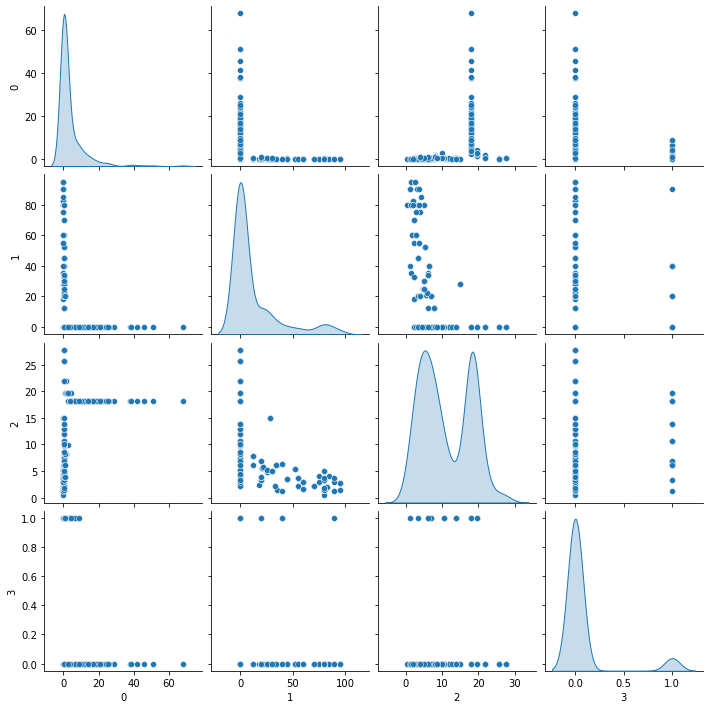

In [16]:
sns.pairplot(DataFrame_train_data[[0, 1, 2, 3]], diag_kind="kde")

モデルの構築

In [28]:
def build_model():
    model = keras.models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=[len(DataFrame_train_data.keys())]))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    #optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer='adam',
                 metrics=['mae', 'mse'])
    
    return model

model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 17,601
Trainable params: 17,601
Non-trainable params: 0
__________________________________________________

モデルの訓練

In [29]:
history = model.fit(normed_train_data, DataFrame_train_label,
                   epochs=600, validation_split=0.2,
                   verbose=1)

Epoch 1/600
11/11 [==============================] - 1s 19ms/step - loss: 558.8256 - mae: 21.6300 - mse: 558.8256 - val_loss: 467.3952 - val_mae: 20.1811 - val_mse: 467.3952
Epoch 2/600
11/11 [==============================] - 0s 6ms/step - loss: 424.1396 - mae: 18.2028 - mse: 424.1396 - val_loss: 252.0412 - val_mae: 14.2820 - val_mse: 252.0412
Epoch 3/600
11/11 [==============================] - 0s 5ms/step - loss: 184.7420 - mae: 11.1962 - mse: 184.7420 - val_loss: 84.8975 - val_mae: 7.0700 - val_mse: 84.8975
Epoch 4/600
11/11 [==============================] - 0s 5ms/step - loss: 83.8809 - mae: 6.8786 - mse: 83.8809 - val_loss: 47.8532 - val_mae: 5.3523 - val_mse: 47.8532
Epoch 5/600
11/11 [==============================] - 0s 5ms/step - loss: 50.0186 - mae: 5.3254 - mse: 50.0186 - val_loss: 33.3072 - val_mae: 4.3772 - val_mse: 33.3072
Epoch 6/600
11/11 [==============================] - 0s 6ms/step - loss: 32.2907 - mae: 4.1427 - mse: 32.2907 - val_loss: 23.6401 - val_mae: 3.7135 -

11/11 [==============================] - 0s 7ms/step - loss: 4.6444 - mae: 1.6449 - mse: 4.6444 - val_loss: 8.2755 - val_mae: 2.1731 - val_mse: 8.2755
Epoch 51/600
11/11 [==============================] - 0s 8ms/step - loss: 4.4553 - mae: 1.6146 - mse: 4.4553 - val_loss: 7.7644 - val_mae: 2.1258 - val_mse: 7.7644
Epoch 52/600
11/11 [==============================] - 0s 6ms/step - loss: 4.5323 - mae: 1.6193 - mse: 4.5323 - val_loss: 8.7292 - val_mae: 2.2584 - val_mse: 8.7292
Epoch 53/600
11/11 [==============================] - 0s 6ms/step - loss: 4.3353 - mae: 1.6024 - mse: 4.3353 - val_loss: 7.1951 - val_mae: 2.0274 - val_mse: 7.1951
Epoch 54/600
11/11 [==============================] - 0s 7ms/step - loss: 3.9251 - mae: 1.5111 - mse: 3.9251 - val_loss: 8.0053 - val_mae: 2.1519 - val_mse: 8.0053
Epoch 55/600
11/11 [==============================] - 0s 8ms/step - loss: 4.3049 - mae: 1.5858 - mse: 4.3049 - val_loss: 7.3936 - val_mae: 2.0771 - val_mse: 7.3936
Epoch 56/600
11/11 [=========

Epoch 100/600
11/11 [==============================] - 0s 4ms/step - loss: 2.4813 - mae: 1.1783 - mse: 2.4813 - val_loss: 7.5267 - val_mae: 2.1757 - val_mse: 7.5267
Epoch 101/600
11/11 [==============================] - 0s 5ms/step - loss: 2.2037 - mae: 1.0846 - mse: 2.2037 - val_loss: 7.5557 - val_mae: 2.1438 - val_mse: 7.5557
Epoch 102/600
11/11 [==============================] - 0s 4ms/step - loss: 2.1321 - mae: 1.0634 - mse: 2.1321 - val_loss: 7.9689 - val_mae: 2.2343 - val_mse: 7.9689
Epoch 103/600
11/11 [==============================] - 0s 4ms/step - loss: 2.0319 - mae: 1.0289 - mse: 2.0319 - val_loss: 8.8030 - val_mae: 2.4245 - val_mse: 8.8030
Epoch 104/600
11/11 [==============================] - 0s 6ms/step - loss: 2.9480 - mae: 1.3507 - mse: 2.9480 - val_loss: 8.5906 - val_mae: 2.3050 - val_mse: 8.5906
Epoch 105/600
11/11 [==============================] - 0s 8ms/step - loss: 2.2544 - mae: 1.1054 - mse: 2.2544 - val_loss: 7.9277 - val_mae: 2.1259 - val_mse: 7.9277
Epoch 106/

Epoch 150/600
11/11 [==============================] - 0s 5ms/step - loss: 1.7267 - mae: 0.9964 - mse: 1.7267 - val_loss: 8.9752 - val_mae: 2.3820 - val_mse: 8.9752
Epoch 151/600
11/11 [==============================] - 0s 4ms/step - loss: 1.4445 - mae: 0.8656 - mse: 1.4445 - val_loss: 8.6814 - val_mae: 2.3950 - val_mse: 8.6814
Epoch 152/600
11/11 [==============================] - 0s 4ms/step - loss: 1.4896 - mae: 0.8720 - mse: 1.4896 - val_loss: 9.5326 - val_mae: 2.5010 - val_mse: 9.5326
Epoch 153/600
11/11 [==============================] - 0s 5ms/step - loss: 1.5907 - mae: 0.9511 - mse: 1.5907 - val_loss: 9.0308 - val_mae: 2.4169 - val_mse: 9.0308
Epoch 154/600
11/11 [==============================] - 0s 4ms/step - loss: 1.3188 - mae: 0.8406 - mse: 1.3188 - val_loss: 7.6023 - val_mae: 2.1989 - val_mse: 7.6023
Epoch 155/600
11/11 [==============================] - 0s 5ms/step - loss: 1.2980 - mae: 0.7927 - mse: 1.2980 - val_loss: 8.0211 - val_mae: 2.2195 - val_mse: 8.0211
Epoch 156/

11/11 [==============================] - 0s 5ms/step - loss: 1.1949 - mae: 0.8031 - mse: 1.1949 - val_loss: 10.0753 - val_mae: 2.5019 - val_mse: 10.0753
Epoch 200/600
11/11 [==============================] - 0s 5ms/step - loss: 1.0916 - mae: 0.7570 - mse: 1.0916 - val_loss: 8.5774 - val_mae: 2.3745 - val_mse: 8.5774
Epoch 201/600
11/11 [==============================] - 0s 5ms/step - loss: 1.1378 - mae: 0.7445 - mse: 1.1378 - val_loss: 8.4087 - val_mae: 2.3599 - val_mse: 8.4087
Epoch 202/600
11/11 [==============================] - 0s 6ms/step - loss: 1.0362 - mae: 0.7045 - mse: 1.0362 - val_loss: 9.3391 - val_mae: 2.4362 - val_mse: 9.3391
Epoch 203/600
11/11 [==============================] - 0s 6ms/step - loss: 1.2041 - mae: 0.8091 - mse: 1.2041 - val_loss: 8.1668 - val_mae: 2.2834 - val_mse: 8.1668
Epoch 204/600
11/11 [==============================] - 0s 4ms/step - loss: 1.1271 - mae: 0.7625 - mse: 1.1271 - val_loss: 8.6229 - val_mae: 2.3427 - val_mse: 8.6229
Epoch 205/600
11/11 [=

Epoch 249/600
11/11 [==============================] - 0s 4ms/step - loss: 0.9438 - mae: 0.7246 - mse: 0.9438 - val_loss: 9.7522 - val_mae: 2.5227 - val_mse: 9.7522
Epoch 250/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6751 - mae: 0.5636 - mse: 0.6751 - val_loss: 9.8156 - val_mae: 2.5047 - val_mse: 9.8156
Epoch 251/600
11/11 [==============================] - 0s 5ms/step - loss: 0.7098 - mae: 0.5944 - mse: 0.7098 - val_loss: 9.9030 - val_mae: 2.5269 - val_mse: 9.9030
Epoch 252/600
11/11 [==============================] - 0s 6ms/step - loss: 0.6627 - mae: 0.5738 - mse: 0.6627 - val_loss: 8.4892 - val_mae: 2.3400 - val_mse: 8.4892
Epoch 253/600
11/11 [==============================] - 0s 5ms/step - loss: 0.6358 - mae: 0.5297 - mse: 0.6358 - val_loss: 8.9719 - val_mae: 2.4232 - val_mse: 8.9719
Epoch 254/600
11/11 [==============================] - 0s 5ms/step - loss: 0.5466 - mae: 0.4874 - mse: 0.5466 - val_loss: 9.0984 - val_mae: 2.4370 - val_mse: 9.0984
Epoch 255/

11/11 [==============================] - 0s 4ms/step - loss: 0.7764 - mae: 0.6290 - mse: 0.7764 - val_loss: 9.7541 - val_mae: 2.4871 - val_mse: 9.7541
Epoch 299/600
11/11 [==============================] - 0s 5ms/step - loss: 2.8351 - mae: 1.1729 - mse: 2.8351 - val_loss: 9.2824 - val_mae: 2.3867 - val_mse: 9.2824
Epoch 300/600
11/11 [==============================] - 0s 5ms/step - loss: 1.9782 - mae: 1.0464 - mse: 1.9782 - val_loss: 12.0834 - val_mae: 2.7916 - val_mse: 12.0834
Epoch 301/600
11/11 [==============================] - 0s 5ms/step - loss: 1.4697 - mae: 0.9055 - mse: 1.4697 - val_loss: 10.4221 - val_mae: 2.5929 - val_mse: 10.4221
Epoch 302/600
11/11 [==============================] - 0s 5ms/step - loss: 1.1026 - mae: 0.7891 - mse: 1.1026 - val_loss: 9.5250 - val_mae: 2.4938 - val_mse: 9.5250
Epoch 303/600
11/11 [==============================] - 0s 6ms/step - loss: 1.0487 - mae: 0.7440 - mse: 1.0487 - val_loss: 8.2232 - val_mae: 2.2353 - val_mse: 8.2232
Epoch 304/600
11/11 

11/11 [==============================] - 0s 4ms/step - loss: 0.4587 - mae: 0.4505 - mse: 0.4587 - val_loss: 10.4016 - val_mae: 2.5617 - val_mse: 10.4016
Epoch 348/600
11/11 [==============================] - 0s 4ms/step - loss: 0.4790 - mae: 0.4754 - mse: 0.4790 - val_loss: 9.9685 - val_mae: 2.4958 - val_mse: 9.9685
Epoch 349/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6764 - mae: 0.5421 - mse: 0.6764 - val_loss: 9.3033 - val_mae: 2.4022 - val_mse: 9.3033
Epoch 350/600
11/11 [==============================] - 0s 4ms/step - loss: 0.5550 - mae: 0.5204 - mse: 0.5550 - val_loss: 9.5076 - val_mae: 2.4242 - val_mse: 9.5076
Epoch 351/600
11/11 [==============================] - 0s 4ms/step - loss: 0.4178 - mae: 0.4546 - mse: 0.4178 - val_loss: 9.8284 - val_mae: 2.4720 - val_mse: 9.8284
Epoch 352/600
11/11 [==============================] - 0s 4ms/step - loss: 0.3990 - mae: 0.4259 - mse: 0.3990 - val_loss: 10.6713 - val_mae: 2.6247 - val_mse: 10.6713
Epoch 353/600
11/11 

11/11 [==============================] - 0s 4ms/step - loss: 0.2648 - mae: 0.3387 - mse: 0.2648 - val_loss: 9.9113 - val_mae: 2.5194 - val_mse: 9.9113
Epoch 397/600
11/11 [==============================] - 0s 4ms/step - loss: 0.2551 - mae: 0.3486 - mse: 0.2551 - val_loss: 10.3062 - val_mae: 2.5430 - val_mse: 10.3062
Epoch 398/600
11/11 [==============================] - 0s 4ms/step - loss: 0.2427 - mae: 0.3361 - mse: 0.2427 - val_loss: 9.3836 - val_mae: 2.4205 - val_mse: 9.3836
Epoch 399/600
11/11 [==============================] - 0s 4ms/step - loss: 0.3071 - mae: 0.4046 - mse: 0.3071 - val_loss: 9.9658 - val_mae: 2.5212 - val_mse: 9.9658
Epoch 400/600
11/11 [==============================] - 0s 5ms/step - loss: 0.2558 - mae: 0.3383 - mse: 0.2558 - val_loss: 9.7693 - val_mae: 2.4870 - val_mse: 9.7693
Epoch 401/600
11/11 [==============================] - 0s 5ms/step - loss: 0.2474 - mae: 0.3224 - mse: 0.2474 - val_loss: 9.4953 - val_mae: 2.4287 - val_mse: 9.4953
Epoch 402/600
11/11 [=

11/11 [==============================] - 0s 4ms/step - loss: 0.5770 - mae: 0.5487 - mse: 0.5770 - val_loss: 11.4971 - val_mae: 2.7552 - val_mse: 11.4971
Epoch 446/600
11/11 [==============================] - 0s 6ms/step - loss: 0.5976 - mae: 0.5753 - mse: 0.5976 - val_loss: 9.7176 - val_mae: 2.4939 - val_mse: 9.7176
Epoch 447/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6906 - mae: 0.5983 - mse: 0.6906 - val_loss: 11.8046 - val_mae: 2.7998 - val_mse: 11.8046
Epoch 448/600
11/11 [==============================] - 0s 5ms/step - loss: 0.7712 - mae: 0.6642 - mse: 0.7712 - val_loss: 9.3941 - val_mae: 2.4438 - val_mse: 9.3941
Epoch 449/600
11/11 [==============================] - 0s 4ms/step - loss: 0.6554 - mae: 0.6062 - mse: 0.6554 - val_loss: 10.4415 - val_mae: 2.5631 - val_mse: 10.4415
Epoch 450/600
11/11 [==============================] - 0s 5ms/step - loss: 0.7553 - mae: 0.6407 - mse: 0.7553 - val_loss: 11.3318 - val_mae: 2.7188 - val_mse: 11.3318
Epoch 451/600
11

11/11 [==============================] - 0s 4ms/step - loss: 0.4920 - mae: 0.5564 - mse: 0.4920 - val_loss: 10.4888 - val_mae: 2.5921 - val_mse: 10.4888
Epoch 495/600
11/11 [==============================] - 0s 4ms/step - loss: 0.3133 - mae: 0.4426 - mse: 0.3133 - val_loss: 11.3597 - val_mae: 2.7151 - val_mse: 11.3597
Epoch 496/600
11/11 [==============================] - 0s 4ms/step - loss: 0.2930 - mae: 0.4233 - mse: 0.2930 - val_loss: 10.2573 - val_mae: 2.5135 - val_mse: 10.2573
Epoch 497/600
11/11 [==============================] - 0s 6ms/step - loss: 0.3524 - mae: 0.4421 - mse: 0.3524 - val_loss: 10.2726 - val_mae: 2.5755 - val_mse: 10.2726
Epoch 498/600
11/11 [==============================] - 0s 3ms/step - loss: 0.3483 - mae: 0.4370 - mse: 0.3483 - val_loss: 10.0592 - val_mae: 2.4991 - val_mse: 10.0592
Epoch 499/600
11/11 [==============================] - 0s 4ms/step - loss: 0.5862 - mae: 0.5112 - mse: 0.5862 - val_loss: 11.8851 - val_mae: 2.7197 - val_mse: 11.8851
Epoch 500/60

11/11 [==============================] - 0s 4ms/step - loss: 0.0990 - mae: 0.2218 - mse: 0.0990 - val_loss: 10.3729 - val_mae: 2.5753 - val_mse: 10.3729
Epoch 544/600
11/11 [==============================] - 0s 4ms/step - loss: 0.1153 - mae: 0.2278 - mse: 0.1153 - val_loss: 9.9604 - val_mae: 2.5079 - val_mse: 9.9604
Epoch 545/600
11/11 [==============================] - 0s 5ms/step - loss: 0.2314 - mae: 0.3449 - mse: 0.2314 - val_loss: 10.1372 - val_mae: 2.5046 - val_mse: 10.1372
Epoch 546/600
11/11 [==============================] - 0s 4ms/step - loss: 0.2065 - mae: 0.3366 - mse: 0.2065 - val_loss: 10.3356 - val_mae: 2.5647 - val_mse: 10.3356
Epoch 547/600
11/11 [==============================] - 0s 5ms/step - loss: 0.1580 - mae: 0.2783 - mse: 0.1580 - val_loss: 11.6090 - val_mae: 2.7298 - val_mse: 11.6090
Epoch 548/600
11/11 [==============================] - 0s 4ms/step - loss: 0.2374 - mae: 0.3718 - mse: 0.2374 - val_loss: 9.9200 - val_mae: 2.4904 - val_mse: 9.9200
Epoch 549/600
11

11/11 [==============================] - 0s 6ms/step - loss: 0.0917 - mae: 0.2235 - mse: 0.0917 - val_loss: 10.3769 - val_mae: 2.5871 - val_mse: 10.3769
Epoch 593/600
11/11 [==============================] - 0s 7ms/step - loss: 0.1054 - mae: 0.2470 - mse: 0.1054 - val_loss: 10.0248 - val_mae: 2.5246 - val_mse: 10.0248
Epoch 594/600
11/11 [==============================] - 0s 7ms/step - loss: 0.2015 - mae: 0.2923 - mse: 0.2015 - val_loss: 10.3052 - val_mae: 2.5915 - val_mse: 10.3052
Epoch 595/600
11/11 [==============================] - 0s 5ms/step - loss: 0.1454 - mae: 0.2720 - mse: 0.1454 - val_loss: 9.9110 - val_mae: 2.5239 - val_mse: 9.9110
Epoch 596/600
11/11 [==============================] - 0s 4ms/step - loss: 0.2062 - mae: 0.3327 - mse: 0.2062 - val_loss: 9.8144 - val_mae: 2.5089 - val_mse: 9.8144
Epoch 597/600
11/11 [==============================] - 0s 4ms/step - loss: 0.2577 - mae: 0.3698 - mse: 0.2577 - val_loss: 9.7124 - val_mae: 2.4889 - val_mse: 9.7124
Epoch 598/600
11/1

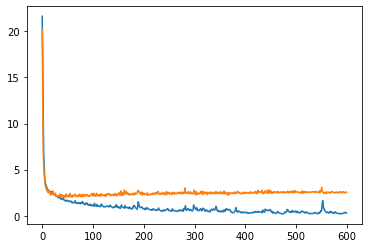

In [30]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

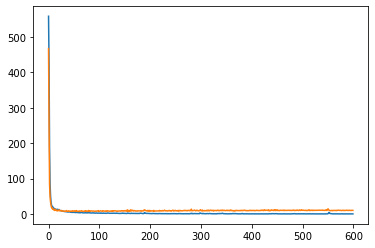

In [31]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

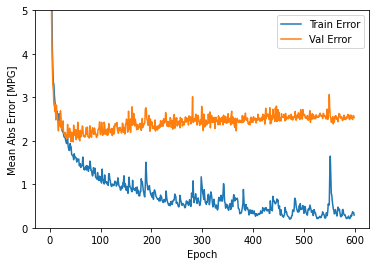

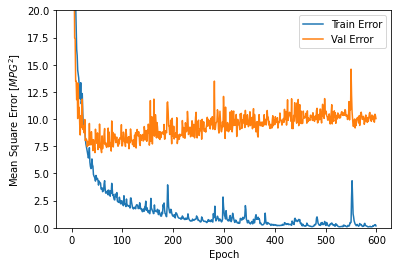

In [32]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [33]:
loss, mae, mse = model.evaluate(normed_test_data, DataFrame_test_label, verbose=2)

4/4 - 0s - loss: 20.1483 - mae: 3.0874 - mse: 20.1483


In [34]:
test_predictions = model.predict(normed_test_data)
test_predictions = model.predict(normed_test_data).flatten()

In [35]:
test_predictions

array([16.29218  , 20.99894  , 36.42406  , 19.457357 , 21.766802 ,
       35.06358  , 40.387943 , 10.919721 , 19.648615 , 20.421473 ,
       13.291933 , 49.302517 , 17.793394 , 20.00954  , 12.836115 ,
       32.51604  , 17.273706 , 40.954803 , 24.543303 , 13.310496 ,
       18.975557 , 16.173418 , 17.13325  , 23.288092 , 10.366009 ,
       12.527579 , 11.582352 , 25.44407  , 19.78594  , 23.271645 ,
       15.473427 , 29.860775 , 21.901155 , 17.950972 , 26.33325  ,
       16.279966 , 27.131117 , 27.71292  ,  8.991791 , 18.610348 ,
       12.026947 , 18.223364 , 28.004915 , 23.984192 , 16.80227  ,
        7.92966  , 23.157387 , 22.430796 , 31.104017 ,  9.948536 ,
       25.908459 , 16.999674 , 25.716646 , 27.455713 , 18.664259 ,
       34.0155   , 25.7469   ,  9.925274 , 32.834454 , 17.454712 ,
       17.318617 , 27.414713 ,  9.621614 , 10.215842 , 25.861067 ,
       22.798475 , 28.498755 , 19.74271  , 31.180178 , 16.99919  ,
       25.661339 , 26.404682 , 18.604721 , 21.170458 , 16.3853

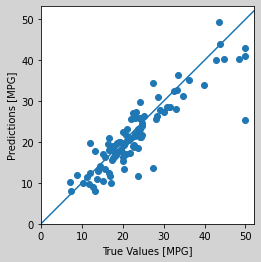

In [36]:
plt.figure(facecolor='lightgray')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

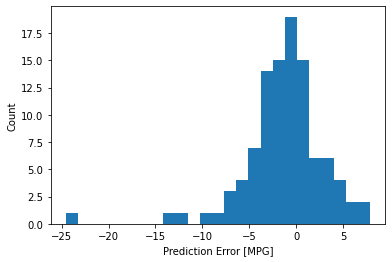

In [37]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")